In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score)
from scipy.stats import skew
from scipy.stats import kurtosis
import hvplot.pandas
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot 
from scipy.stats import kstest,norm,spearmanr,pearsonr
from fitter import Fitter, get_common_distributions
from sklearn import metrics
from sklearn.metrics import classification_report 
from statsmodels.tools import add_constant

In [2]:
accepted = pd.read_csv(r"C:\Users\chris\Desktop\mathematical_methods_lending_club\accepted_2007_2018q4.csv",
                      usecols=["loan_status","loan_amnt","int_rate","grade","emp_title","emp_length","installment",
                               "home_ownership","annual_inc","dti","revol_bal","total_acc","open_acc","pub_rec",
                               "revol_util","tot_cur_bal","mort_acc","pub_rec_bankruptcies"])

In [3]:
display(accepted.head())

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,mort_acc,pub_rec_bankruptcies
0,3600.0,13.99,123.03,C,leadman,10+ years,MORTGAGE,55000.0,Fully Paid,5.91,7.0,0.0,2765.0,29.7,13.0,144904.0,1.0,0.0
1,24700.0,11.99,820.28,C,Engineer,10+ years,MORTGAGE,65000.0,Fully Paid,16.06,22.0,0.0,21470.0,19.2,38.0,204396.0,4.0,0.0
2,20000.0,10.78,432.66,B,truck driver,10+ years,MORTGAGE,63000.0,Fully Paid,10.78,6.0,0.0,7869.0,56.2,18.0,189699.0,5.0,0.0
3,35000.0,14.85,829.90,C,Information Systems Officer,10+ years,MORTGAGE,110000.0,Current,17.06,13.0,0.0,7802.0,11.6,17.0,301500.0,1.0,0.0
4,10400.0,22.45,289.91,F,Contract Specialist,3 years,MORTGAGE,104433.0,Fully Paid,25.37,12.0,0.0,21929.0,64.5,35.0,331730.0,6.0,0.0


In [4]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   int_rate              float64
 2   installment           float64
 3   grade                 object 
 4   emp_title             object 
 5   emp_length            object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   loan_status           object 
 9   dti                   float64
 10  open_acc              float64
 11  pub_rec               float64
 12  revol_bal             float64
 13  revol_util            float64
 14  total_acc             float64
 15  tot_cur_bal           float64
 16  mort_acc              float64
 17  pub_rec_bankruptcies  float64
dtypes: float64(13), object(5)
memory usage: 310.5+ MB


In [3]:
#getting the number of missing values of each column
accepted.isnull().sum()

loan_amnt                   33
int_rate                    33
installment                 33
grade                       33
emp_title               167002
emp_length              146940
home_ownership              33
annual_inc                  37
loan_status                 33
dti                       1744
open_acc                    62
pub_rec                     62
revol_bal                   33
revol_util                1835
total_acc                   62
tot_cur_bal              70309
mort_acc                 50063
pub_rec_bankruptcies      1398
dtype: int64

In [3]:
#missing values account for less than 8% of the whole dataset therefore we drop them
final_df=accepted.dropna()

In [5]:
final_df.isnull().sum()

loan_amnt               0
int_rate                0
installment             0
grade                   0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
loan_status             0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
tot_cur_bal             0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [6]:
#overview of the final dataset
final_df.head()

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,mort_acc,pub_rec_bankruptcies
0,3600.0,13.99,123.03,C,leadman,10+ years,MORTGAGE,55000.0,Fully Paid,5.91,7.0,0.0,2765.0,29.7,13.0,144904.0,1.0,0.0
1,24700.0,11.99,820.28,C,Engineer,10+ years,MORTGAGE,65000.0,Fully Paid,16.06,22.0,0.0,21470.0,19.2,38.0,204396.0,4.0,0.0
2,20000.0,10.78,432.66,B,truck driver,10+ years,MORTGAGE,63000.0,Fully Paid,10.78,6.0,0.0,7869.0,56.2,18.0,189699.0,5.0,0.0
3,35000.0,14.85,829.90,C,Information Systems Officer,10+ years,MORTGAGE,110000.0,Current,17.06,13.0,0.0,7802.0,11.6,17.0,301500.0,1.0,0.0
4,10400.0,22.45,289.91,F,Contract Specialist,3 years,MORTGAGE,104433.0,Fully Paid,25.37,12.0,0.0,21929.0,64.5,35.0,331730.0,6.0,0.0


In [7]:
#summary of the final dataframe 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025450 entries, 0 to 2260698
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   int_rate              float64
 2   installment           float64
 3   grade                 object 
 4   emp_title             object 
 5   emp_length            object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   loan_status           object 
 9   dti                   float64
 10  open_acc              float64
 11  pub_rec               float64
 12  revol_bal             float64
 13  revol_util            float64
 14  total_acc             float64
 15  tot_cur_bal           float64
 16  mort_acc              float64
 17  pub_rec_bankruptcies  float64
dtypes: float64(13), object(5)
memory usage: 293.6+ MB


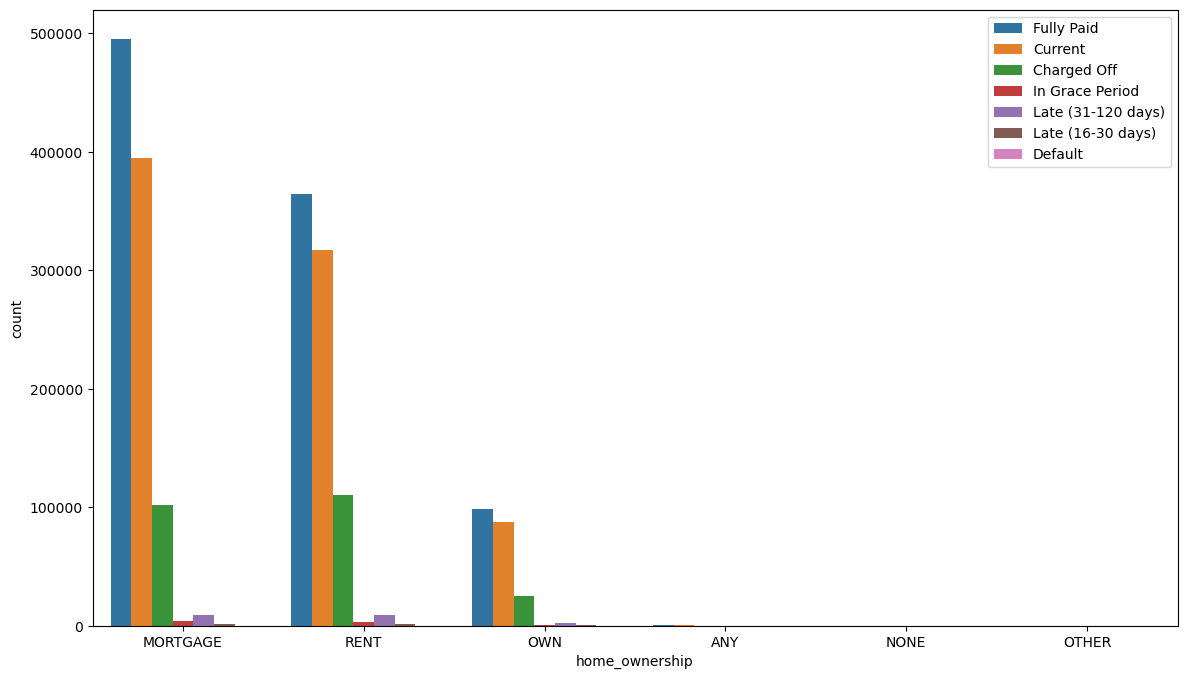

In [15]:
#home ownership based on loan status 
fig=plt.figure(figsize=(14,8))
sns.countplot(x="home_ownership", data=final_df,hue="loan_status")
plt.legend(loc="upper right")

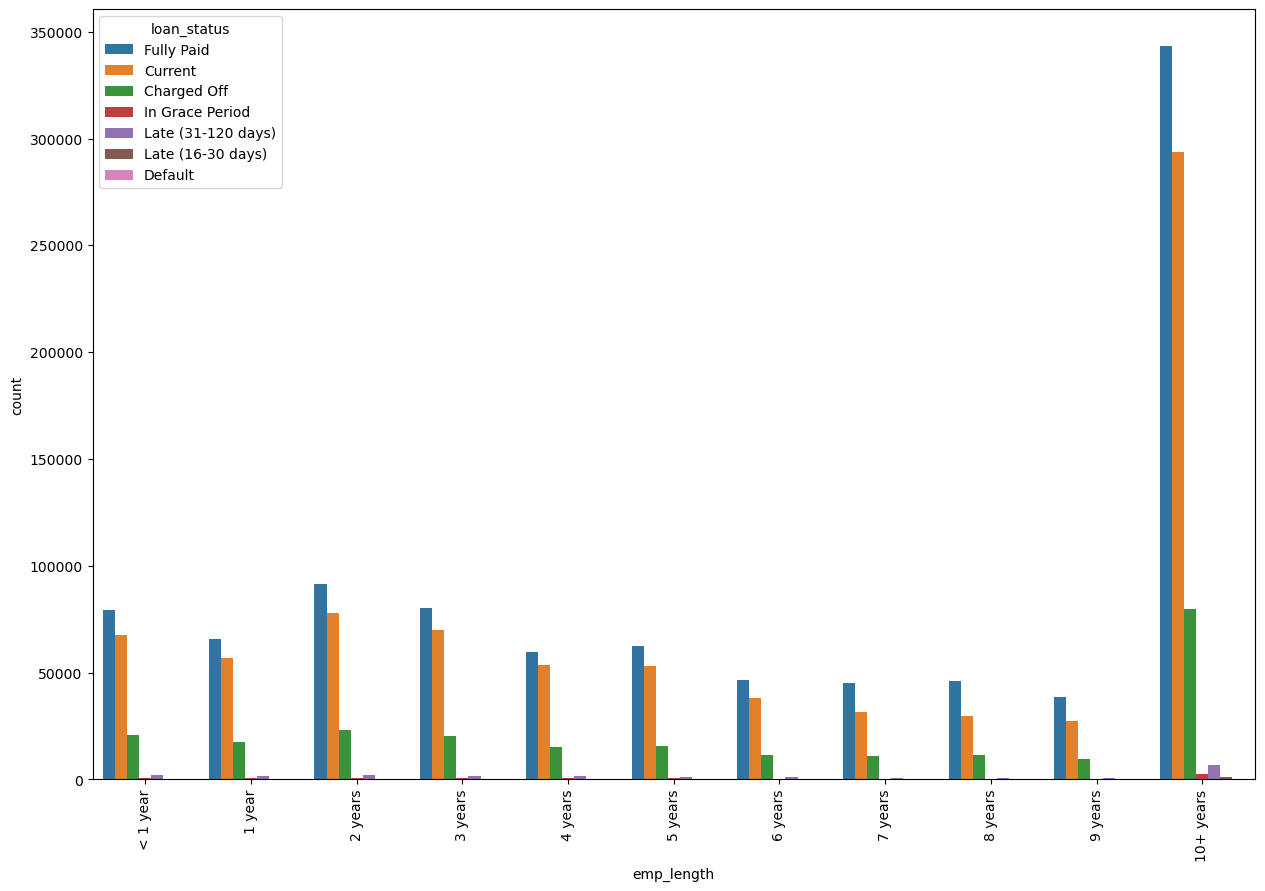

In [18]:
plt.figure(figsize=(15, 10))
labels = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=final_df, hue='loan_status', order=labels)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

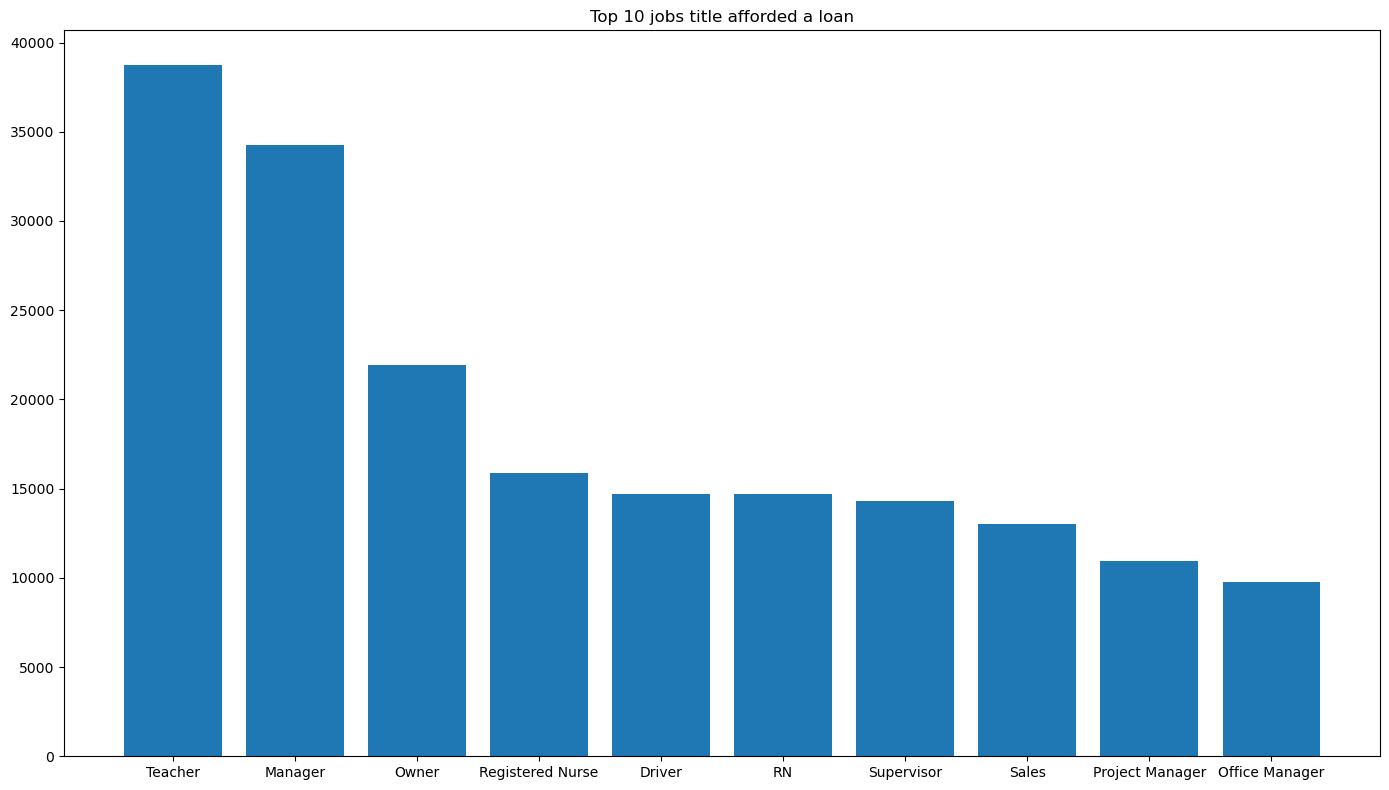

In [17]:
fig = plt.figure(figsize=(14,8))
plt.bar(final_df.emp_title.value_counts()[:10].index, final_df.emp_title.value_counts()[:10])
plt.title("Top 10 jobs title afforded a loan")
plt.tight_layout()

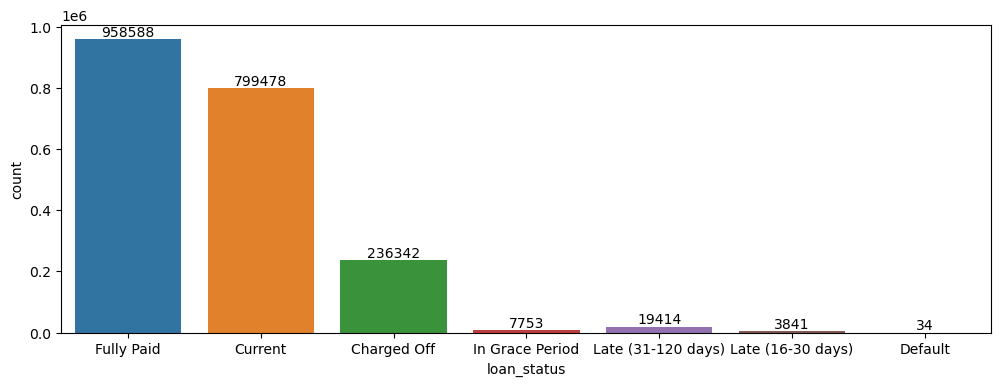

In [10]:
#Exploratory data analysis
#the goal is to get a first overview of the dataset and its variables
#first we will explore categorical variables starting with loan status 
plt.figure(figsize=(12,4))
ax=sns.countplot(x="loan_status", data=final_df)
for i in ax.containers:
    ax.bar_label(i,)

[Text(0.5, 1.0, 'Charged off loans by grade')]

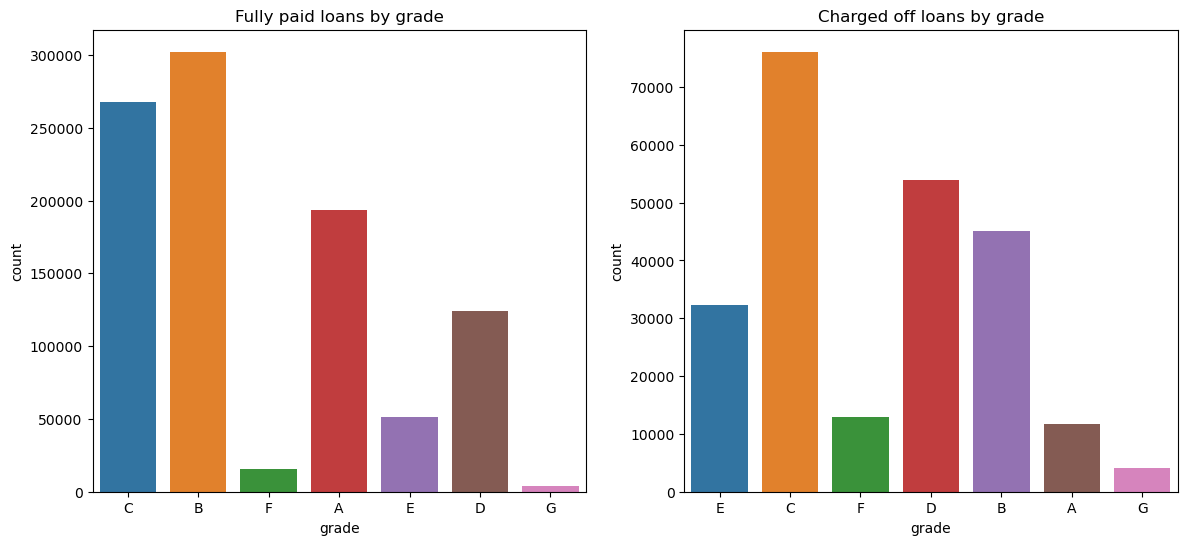

In [11]:
#it is useful to see fully paid and charged off loans by grade 
fully_paid = final_df.loc[final_df['loan_status']=='Fully Paid', 'grade']
charged_off = final_df.loc[final_df['loan_status']=='Charged Off', 'grade']
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.countplot(x=fully_paid,ax=ax[0]).set(title="Fully paid loans by grade")
sns.countplot(x=charged_off,ax=ax[1]).set(title="Charged off loans by grade")

<AxesSubplot:>

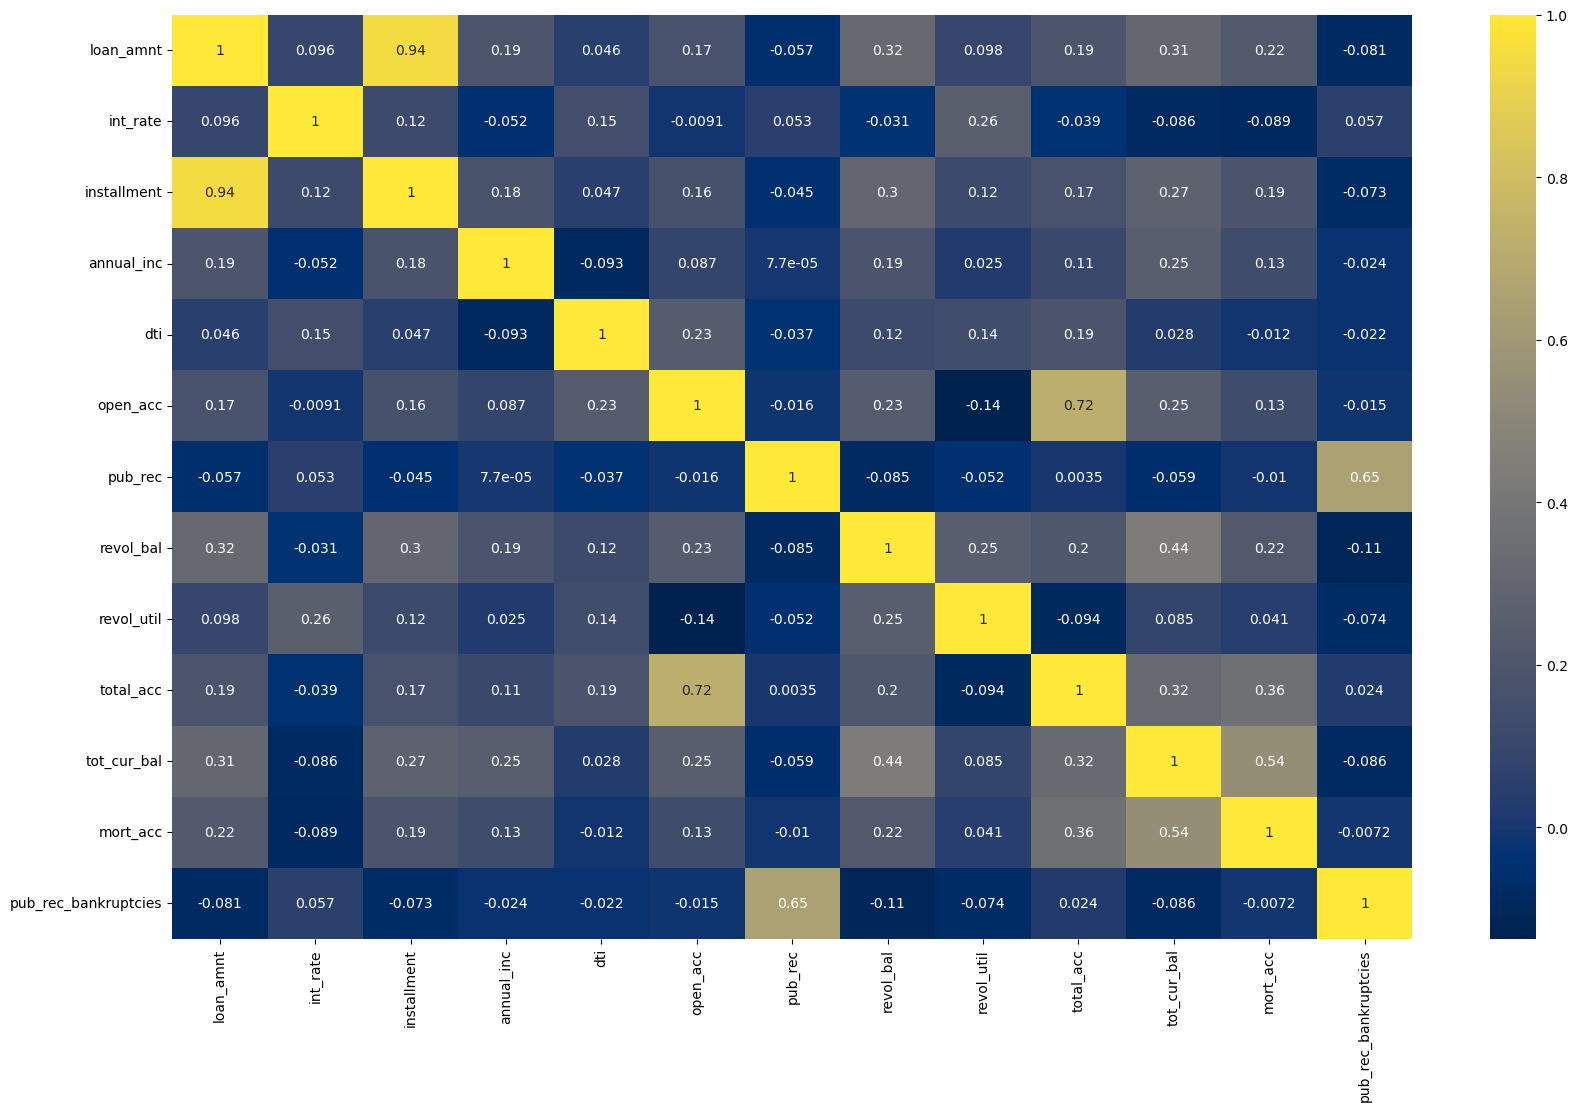

In [9]:
#correlation heatmap 
fig= plt.figure(figsize=(20,12))
sns.heatmap(final_df.corr(), annot=True, cmap="cividis")

In [4]:
#we drop categorical features in order to use PCA to determine which variables hold the highest amount of info about the dataset 
new_data= final_df.drop(["grade","emp_title","emp_length","home_ownership","loan_status"], axis=1)

In [5]:
#data standardization because their measures and scales are quite unequal
#example: 0<=annual inc <= 110.000.000 while 2 <=total_acc<=176
#stardard scaler from sk learn transforms data into standard normal dist using 
#Z = (X-u)/s where u=mean and s=standard deviation 
sc = StandardScaler()
pca_data = sc.fit_transform(new_data)
pca_df=pd.DataFrame(pca_data)

In [6]:
#we print the explained variance ratio in order to decided which components should we keep
#a general rule is that we should keep more than 80% of the explained variance
#therefore n_components is set to 0.8
pca = PCA(n_components=0.80)
new_data_pca = pca.fit_transform(pca_data)
pca_df = pd.DataFrame(new_data_pca)

In [7]:
display(pca_df)

,0,1,2,3,4,5,6
0,-2.091261,-0.257432,-0.862051,0.933743,0.272802,-0.075303,0.728368
1,2.427407,0.879678,-0.743160,0.167939,-1.594662,-0.694422,0.455428
2,0.195905,-0.709306,-0.147491,1.469917,0.585964,-1.323870,0.572052
3,1.416192,-0.753678,0.614382,0.763685,-2.112674,-0.294621,0.231574
4,1.342338,0.264446,-0.438054,-0.756901,2.044351,-0.726135,2.135836
...,...,...,...,...,...,...,...
2025445,1.349875,-0.755505,0.222616,-0.692457,0.325476,0.486340,-0.587728
2025446,2.639603,2.582622,-0.648989,-1.242614,-0.703763,-0.066733,-0.103752
2025447,1.842079,-1.288844,1.094849,1.229353,-1.302410,0.050465,0.361841
2025448,0.292673,1.368385,2.539861,0.083664,0.176915,0.019165,-0.156987


In [31]:
#explained variance ratio (more than 80% is considered solid)
print(pca.explained_variance_ratio_.sum())

[0.23706357 0.13387561 0.1224653  0.10747886 0.09137364 0.06842007
 0.06304888]
0.8237259200857389


In [32]:
#computing the coefficients of the linear combination of the original variables 
#from which the principal components (PCs) are constructed
var_weights = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2',"PC3","PC4","PC5","PC6","PC7"],index=new_data.columns)


In [33]:
#we compute the covariance of each feature and the principal  component 
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2',"PC3","PC4","PC5","PC6","PC7"],index=new_data.columns)

In [8]:
#the most important variables chosen through the pca
important_vars = new_data.drop(["int_rate","dti","revol_util","pub_rec","pub_rec_bankruptcies"],axis=1) 
important_vars

,loan_amnt,installment,annual_inc,open_acc,revol_bal,total_acc,tot_cur_bal,mort_acc
0,3600.0,123.03,55000.0,7.0,2765.0,13.0,144904.0,1.0
1,24700.0,820.28,65000.0,22.0,21470.0,38.0,204396.0,4.0
2,20000.0,432.66,63000.0,6.0,7869.0,18.0,189699.0,5.0
3,35000.0,829.90,110000.0,13.0,7802.0,17.0,301500.0,1.0
4,10400.0,289.91,104433.0,12.0,21929.0,35.0,331730.0,6.0
...,...,...,...,...,...,...,...,...
2260694,24000.0,543.50,95000.0,5.0,49431.0,54.0,104422.0,0.0
2260695,24000.0,515.74,108000.0,24.0,21665.0,58.0,140118.0,4.0
2260696,40000.0,859.56,227000.0,5.0,8633.0,37.0,28398.0,3.0
2260697,24000.0,564.56,110000.0,10.0,17641.0,31.0,62426.0,2.0


[Text(0.5, 1.0, 'Mortgage account')]

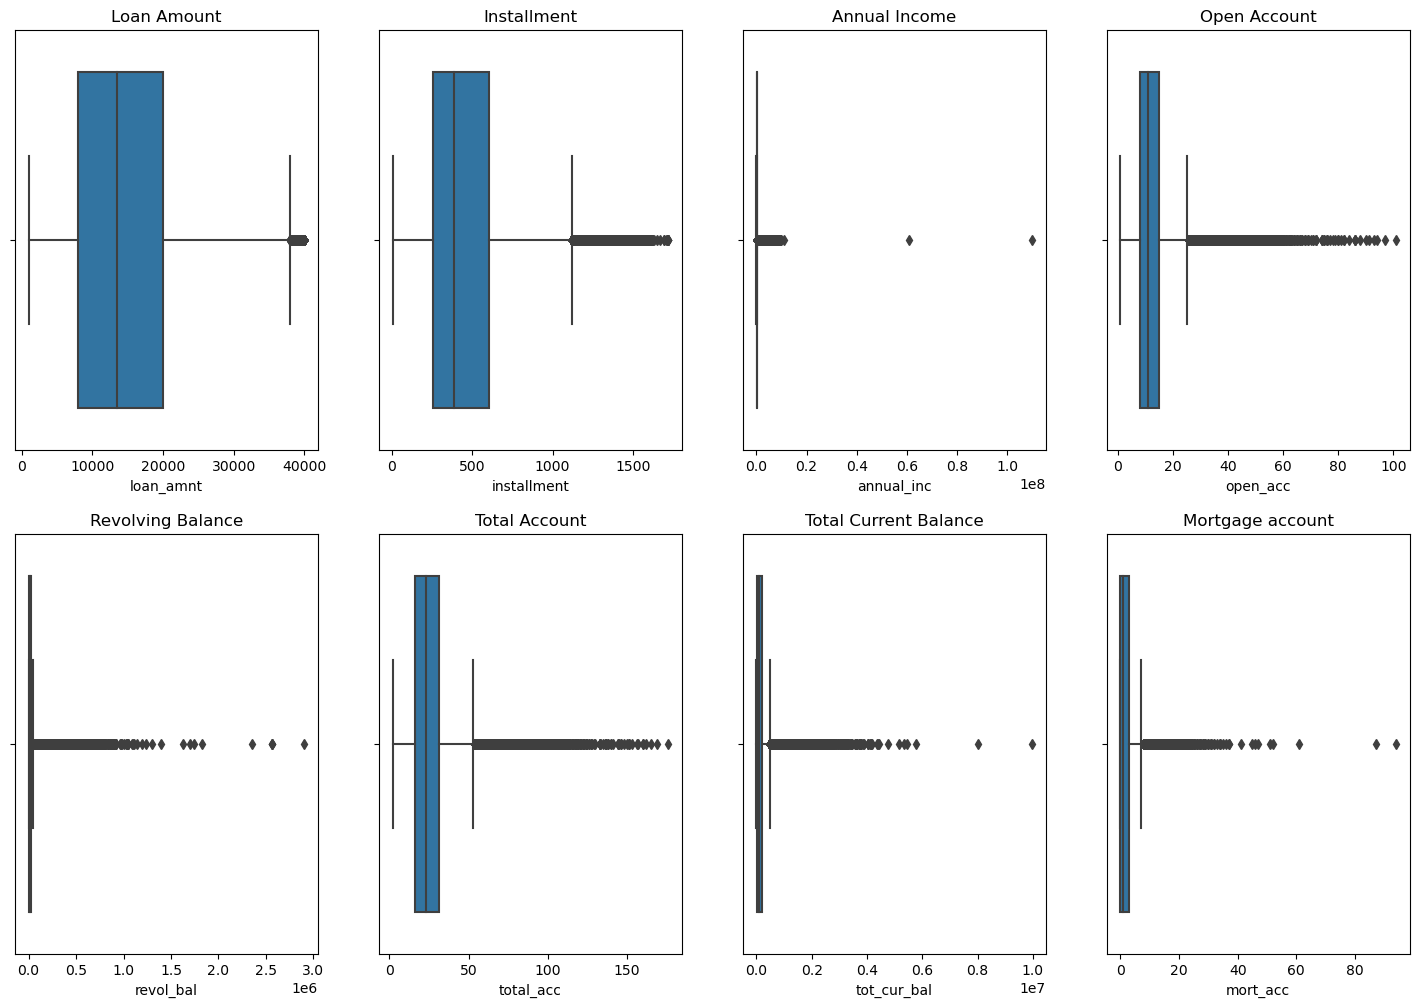

In [13]:
#outliers detection 
#we will remove outliers before visualizing in order to have the best visualization possible 
#and extract the best insights about the data
#first we will visualize outliers then set lower and upper boundaries for each variable 
#after applying lower and upper bounds we will re-visualize the boxplots
fig, ax = plt.subplots(2,4,figsize=(18,12))
sns.boxplot(x=important_vars["loan_amnt"],ax=ax[0,0]).set(title="Loan Amount")
sns.boxplot(x=important_vars["installment"],ax=ax[0,1]).set(title="Installment")
sns.boxplot(x=important_vars["annual_inc"],ax=ax[0,2]).set(title="Annual Income")
sns.boxplot(x=important_vars["open_acc"],ax=ax[0,3]).set(title="Open Account")
sns.boxplot(x=important_vars["revol_bal"],ax=ax[1,0]).set(title="Revolving Balance")
sns.boxplot(x=important_vars["total_acc"],ax=ax[1,1]).set(title="Total Account")
sns.boxplot(x=important_vars["tot_cur_bal"],ax=ax[1,2]).set(title="Total Current Balance")
sns.boxplot(x=important_vars["mort_acc"],ax=ax[1,3]).set(title="Mortgage account")

In [13]:
important_vars_clean=important_vars.loc[(important_vars["annual_inc"] <=200000) &
                                        (important_vars["open_acc"] <= 20) &
                                        (important_vars["total_acc"] <= 40) & (important_vars["tot_cur_bal"] <=90000) & 
                                        (important_vars["revol_bal"] <=50000) & (important_vars["mort_acc"] <= 10) & 
                                        (important_vars["installment"]<=1200)]
important_vars_clean

,loan_amnt,installment,annual_inc,open_acc,revol_bal,total_acc,tot_cur_bal,mort_acc
5,11950.0,405.18,34000.0,5.0,8822.0,6.0,12798.0,0.0
8,10000.0,306.45,85000.0,14.0,10464.0,23.0,27957.0,1.0
13,18000.0,471.70,150000.0,18.0,14052.0,27.0,36247.0,2.0
15,9600.0,298.58,60000.0,7.0,7722.0,9.0,55387.0,0.0
19,8650.0,320.99,55000.0,18.0,9568.0,19.0,18926.0,0.0
...,...,...,...,...,...,...,...,...
2260681,24000.0,543.50,63000.0,10.0,19845.0,23.0,35214.0,2.0
2260682,30000.0,697.90,107000.0,14.0,25120.0,35.0,69005.0,4.0
2260692,16000.0,362.34,150000.0,12.0,7700.0,28.0,65797.0,0.0
2260693,24000.0,515.74,125000.0,15.0,22448.0,22.0,31320.0,0.0


[Text(0.5, 1.0, 'Mortgage account')]

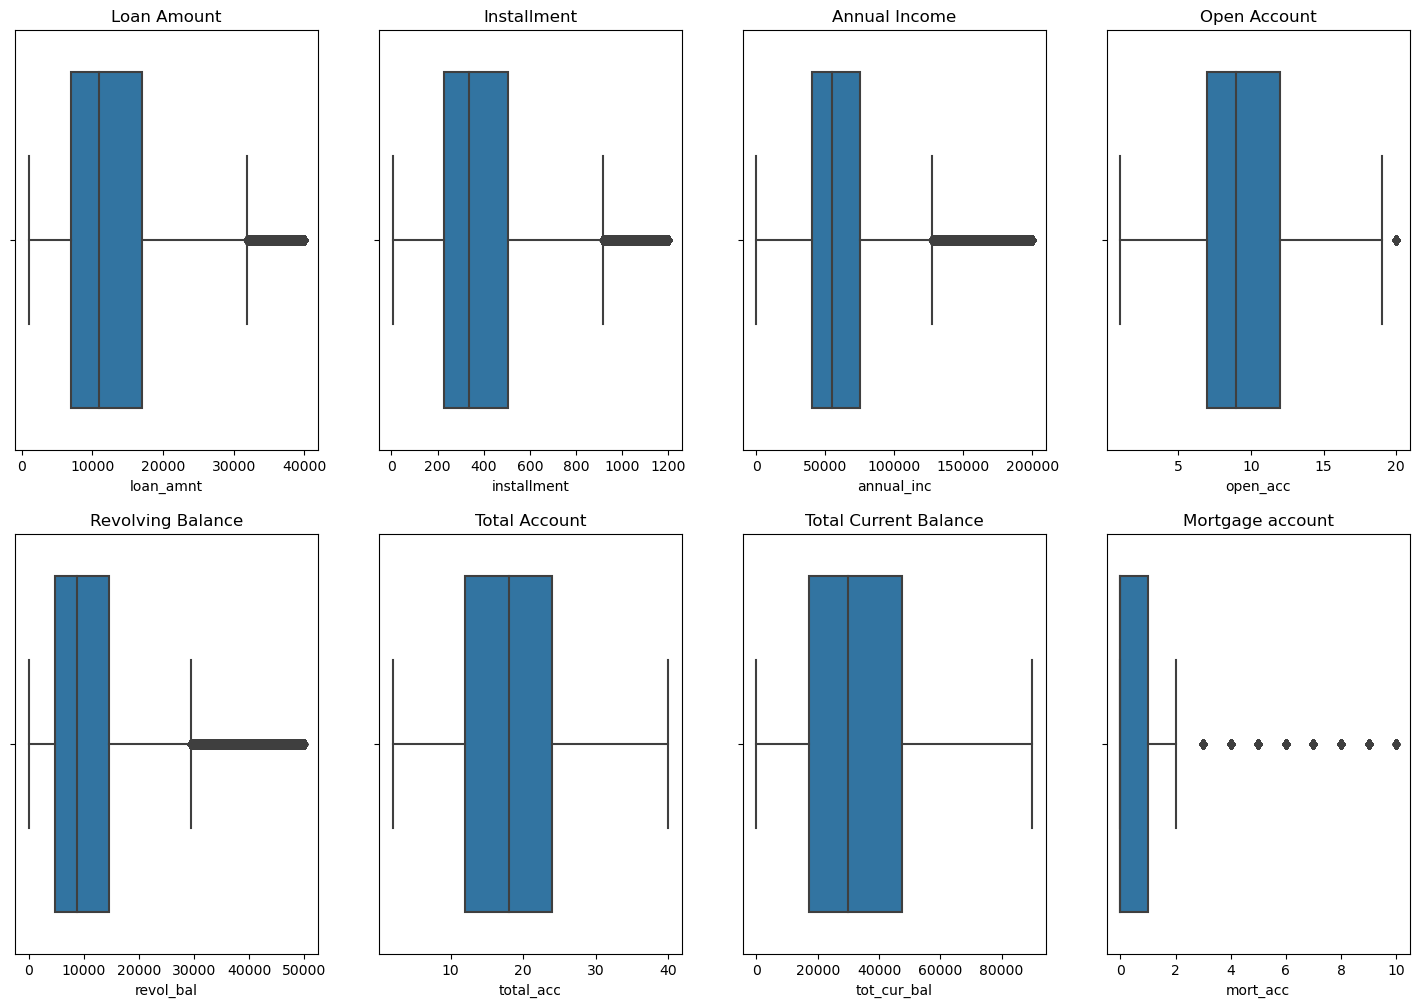

In [16]:
#boxplots after removing outliers 
fig, ax = plt.subplots(2,4,figsize=(18,12))
sns.boxplot(x=important_vars_clean["loan_amnt"],ax=ax[0,0]).set(title="Loan Amount")
sns.boxplot(x=important_vars_clean["installment"],ax=ax[0,1]).set(title="Installment")
sns.boxplot(x=important_vars_clean["annual_inc"],ax=ax[0,2]).set(title="Annual Income")
sns.boxplot(x=important_vars_clean["open_acc"],ax=ax[0,3]).set(title="Open Account")
sns.boxplot(x=important_vars_clean["revol_bal"],ax=ax[1,0]).set(title="Revolving Balance")
sns.boxplot(x=important_vars_clean["total_acc"],ax=ax[1,1]).set(title="Total Account")
sns.boxplot(x=important_vars_clean["tot_cur_bal"],ax=ax[1,2]).set(title="Total Current Balance")
sns.boxplot(x=important_vars_clean["mort_acc"],ax=ax[1,3]).set(title="Mortgage account")

<AxesSubplot:>

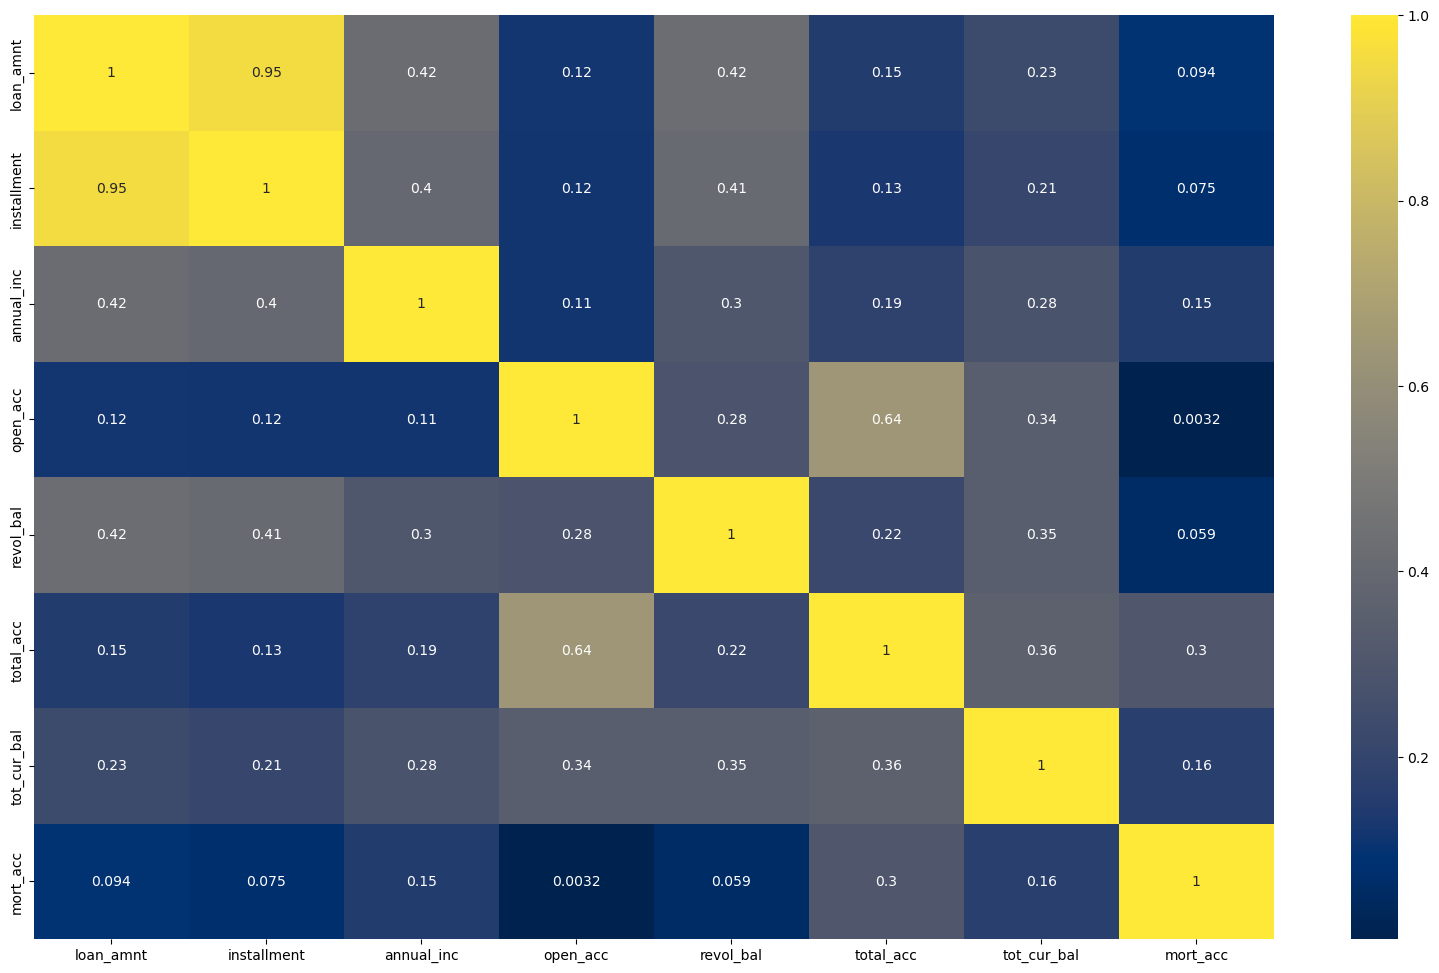

In [37]:
#now that the number of variables have been reduced and the outliers are removed
#we re-explore correlation between the variables
fig= plt.figure(figsize=(20,12))
sns.heatmap(important_vars_clean.corr(), annot=True, cmap="cividis")

In [17]:
#computing the descriptive statistics of each variable
important_vars_clean.describe()

,loan_amnt,installment,annual_inc,open_acc,revol_bal,total_acc,tot_cur_bal,mort_acc
count,947122.000000,947122.000000,947122.000000,947122.000000,947122.000000,947122.000000,947122.000000,947122.000000
mean,12757.504603,387.129524,61160.961631,9.618748,10888.144810,18.736223,34062.814853,0.519559
std,7727.467614,223.720340,29869.953267,3.964149,8461.493244,8.265333,21604.616626,1.114651
min,1000.000000,4.930000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,7000.000000,226.320000,40000.000000,7.000000,4812.000000,12.000000,17029.000000,0.000000
50%,10975.000000,335.805000,55000.000000,9.000000,8770.000000,18.000000,29969.000000,0.000000
75%,16975.000000,503.180000,75000.000000,12.000000,14655.000000,24.000000,47630.000000,1.000000
max,40000.000000,1199.790000,200000.000000,20.000000,49998.000000,40.000000,90000.000000,10.000000


In [21]:
type(important_vars_clean)

pandas.core.frame.DataFrame

In [14]:
#creating functions to compute descriptive statistics that describe command wont show
def find_skew(df):
    return skew(df,bias=False)

def find_kurt(df):
    return kurtosis(df,bias=False)

def find_range(df):
    var_range=df.max()-df.min()
    return var_range

def find_median(df):
    return df.median()

def find_mode(df):
    return df.mode()[0]

def find_iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))

In [15]:
skewness=important_vars_clean.apply(find_skew)
var_kurtosis=important_vars_clean.apply(find_kurt)
var_range=important_vars_clean.apply(find_range)
var_median=important_vars_clean.apply(find_median)
var_mode=important_vars_clean.apply(find_mode)
var_iqr = important_vars_clean.apply(find_iqr)
print(f"The skewness of each variable is:\n{skewness}")
print(f"The kurtosis of each variable is:\n{var_kurtosis}")
print(f"The range of each variable is:\n{var_range}")
print(f"the median of each variable is:\n{var_median}")
print(f"the mode of each variable is:\n{var_mode}")
print(f"The iqr of each variable is:\n{var_iqr}")

The skewness of each variable is:
loan_amnt      0.962509
installment    1.029375
annual_inc     1.378924
open_acc       0.477077
revol_bal      1.429752
total_acc      0.410771
tot_cur_bal    0.662270
mort_acc       2.775909
dtype: float64
The kurtosis of each variable is:
loan_amnt      0.607348
installment    0.913845
annual_inc     2.531591
open_acc      -0.329630
revol_bal      2.360214
total_acc     -0.488488
tot_cur_bal   -0.353609
mort_acc       9.245061
dtype: float64
The range of each variable is:
loan_amnt       39000.00
installment      1194.86
annual_inc     200000.00
open_acc           19.00
revol_bal       49998.00
total_acc          38.00
tot_cur_bal     90000.00
mort_acc           10.00
dtype: float64
the median of each variable is:
loan_amnt      10975.000
installment      335.805
annual_inc     55000.000
open_acc           9.000
revol_bal       8770.000
total_acc         18.000
tot_cur_bal    29969.000
mort_acc           0.000
dtype: float64
the mode of each variable

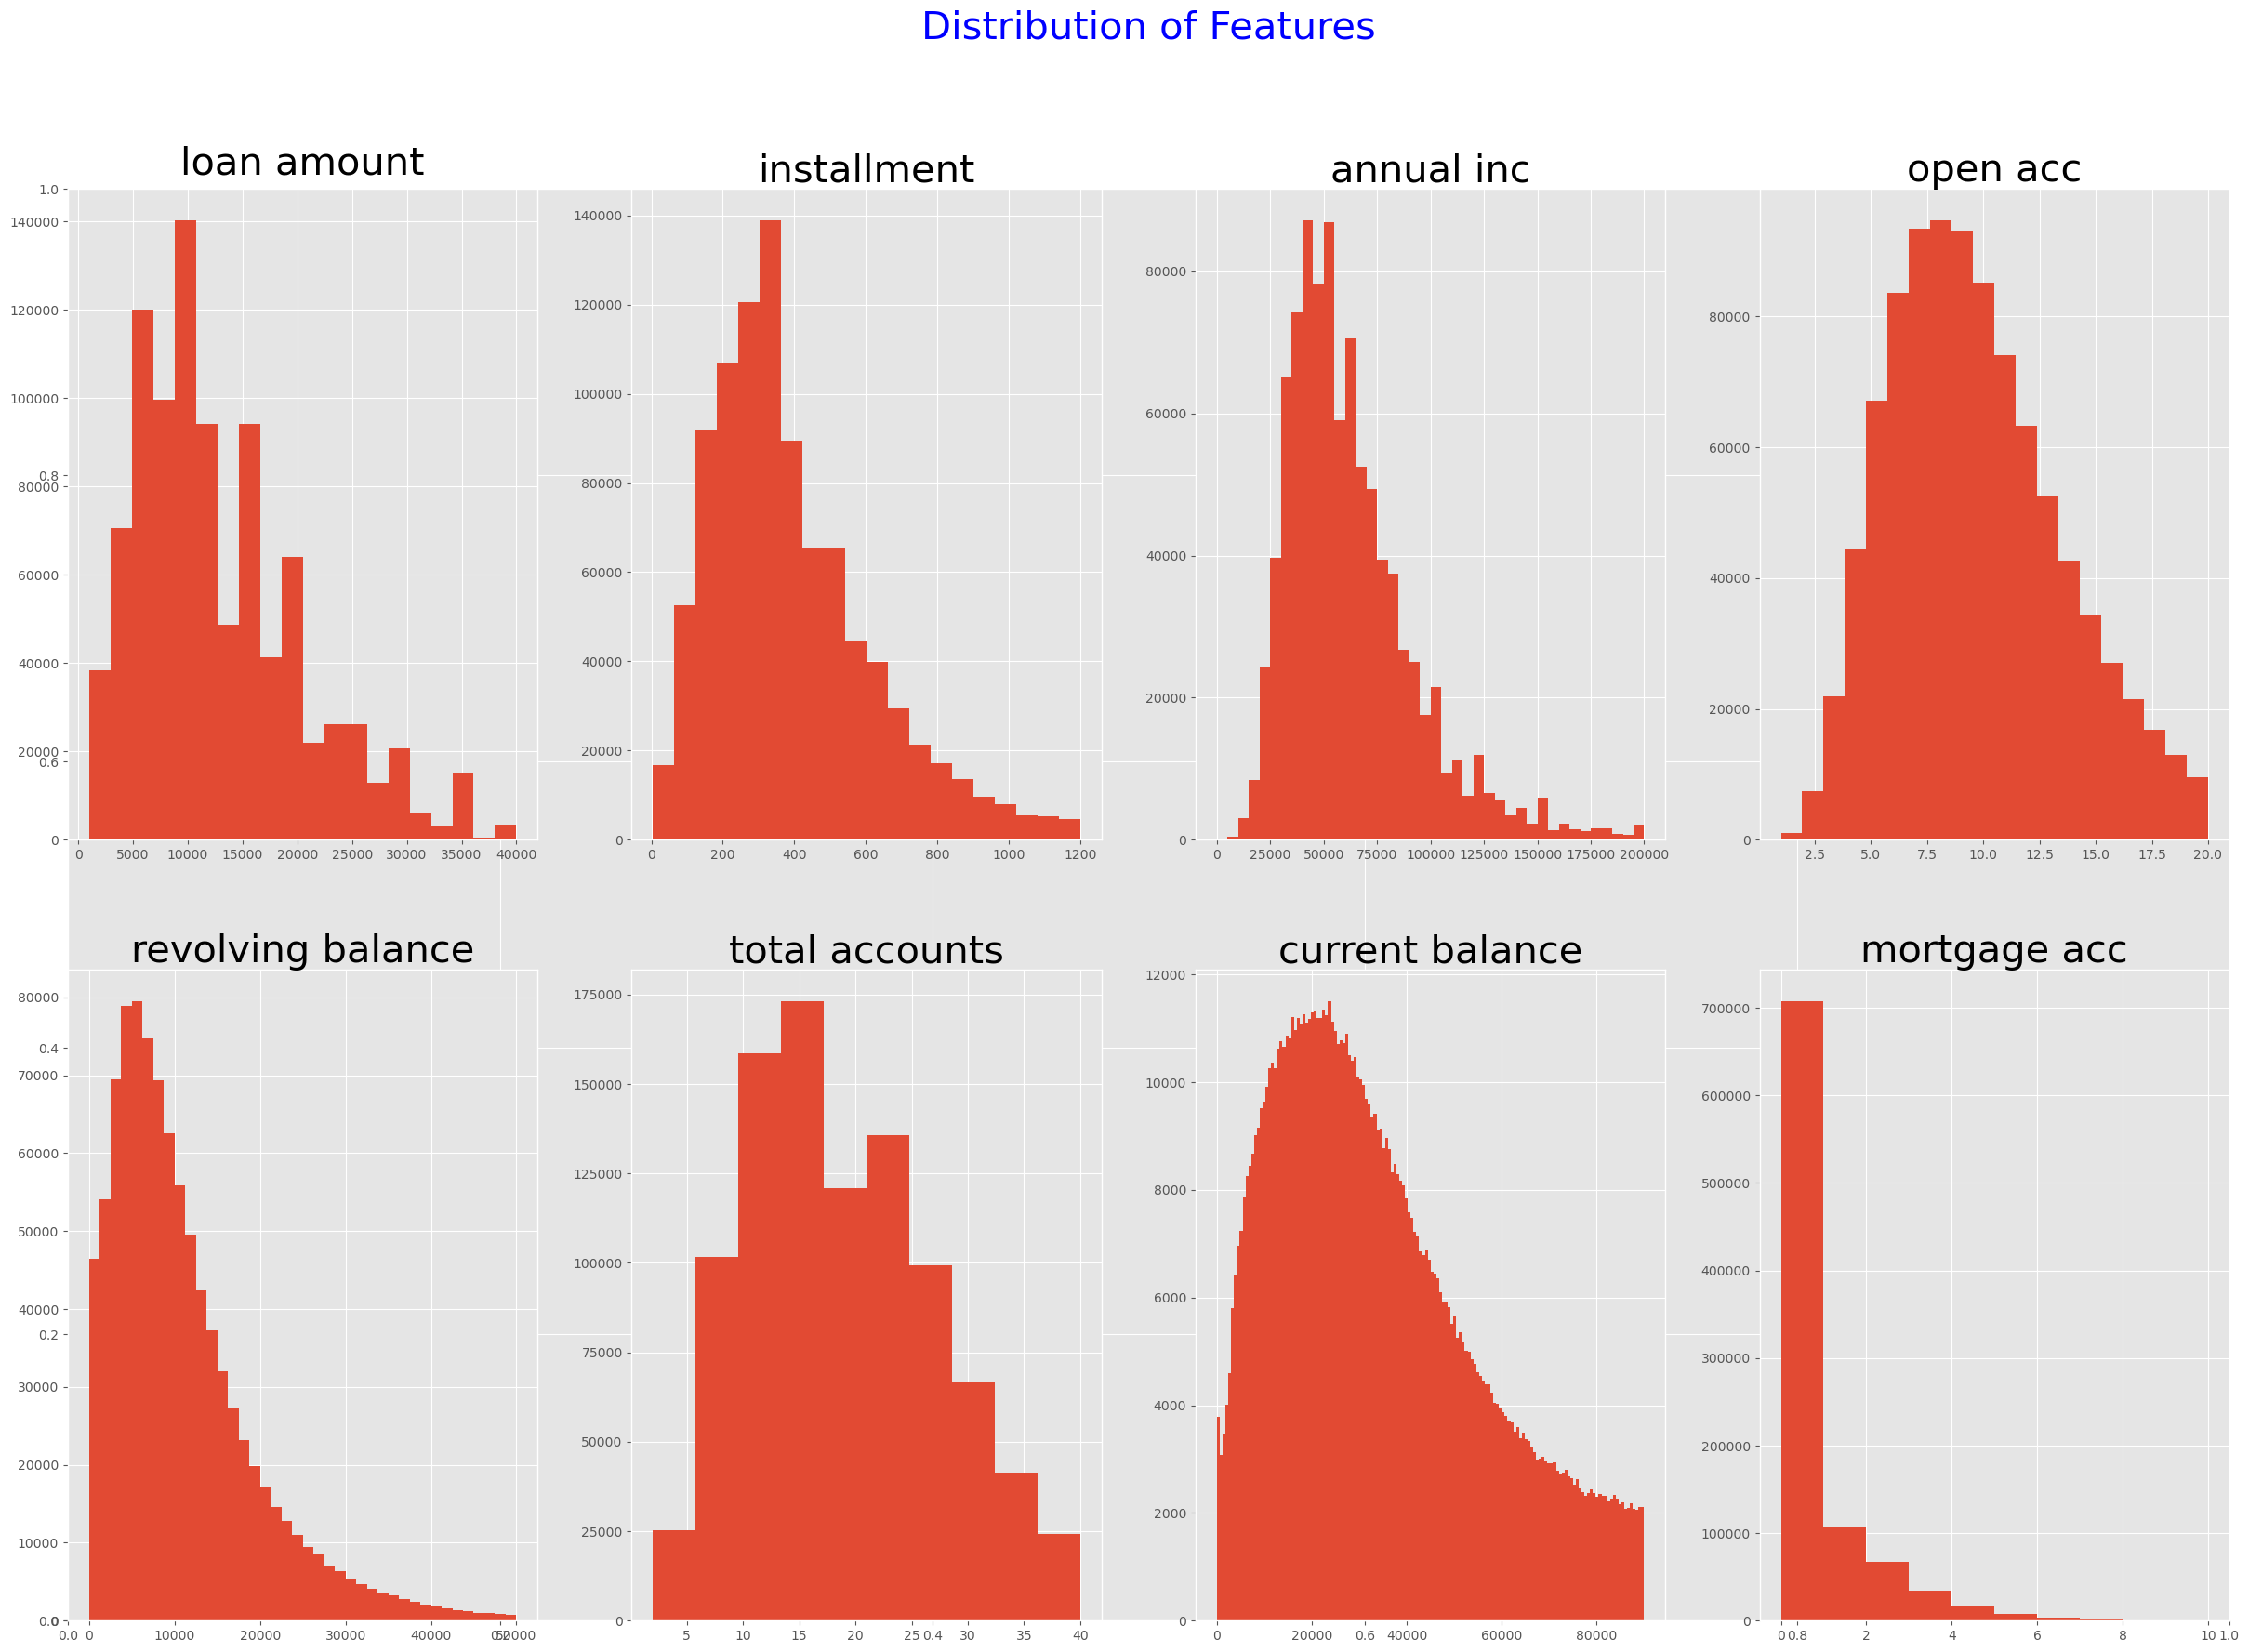

In [81]:
fig=plt.figure(figsize=(30,20))
plt.style.use("ggplot")
plt.title("Distribution of Features",fontsize=30,color="blue",x=0.5,y=1.1)
sub1=fig.add_subplot(241)
sub1.set_title("loan amount",pad=-14,fontdict={'fontsize': 30, 'fontweight': 'medium'},x=0.5,y=1.05)
sub1.hist(important_vars_clean["loan_amnt"],bins=20)
sub2=fig.add_subplot(242)
sub2.set_title("installment",fontdict={'fontsize': 30, 'fontweight': 'medium'},x=0.5,y=1.0)
sub2.hist(important_vars_clean["installment"],bins=20)
sub3=fig.add_subplot(243)
sub3.set_title("annual inc",fontdict={'fontsize': 30, 'fontweight': 'medium'},x=0.5,y=1.0)
sub3.hist(important_vars_clean["annual_inc"],bins=40)
sub4=fig.add_subplot(244)
sub4.set_title("open acc",fontdict={'fontsize': 30, 'fontweight': 'medium'},x=0.5,y=1.0)
sub4.hist(important_vars_clean["open_acc"],bins=20)
sub5=fig.add_subplot(245)
sub5.set_title("revolving balance",fontdict={'fontsize': 30, 'fontweight': 'medium'},x=0.5,y=1.0)
sub5.hist(important_vars_clean["revol_bal"],bins=40)
sub6=fig.add_subplot(246)
sub6.set_title("total accounts",fontdict={'fontsize': 30, 'fontweight': 'medium'},x=0.5,y=1.0)
sub6.hist(important_vars_clean["total_acc"],bins=10)
sub7=fig.add_subplot(247)
sub7.set_title("current balance",fontdict={'fontsize': 30, 'fontweight': 'medium'},x=0.5,y=1.0)
sub7.hist(important_vars_clean["tot_cur_bal"],bins=150)
sub8=fig.add_subplot(248)
sub8.set_title("mortgage acc",fontdict={'fontsize': 30, 'fontweight': 'medium'},x=0.5,y=1.0)
sub8.hist(important_vars_clean["mort_acc"],bins=10)
plt.show()

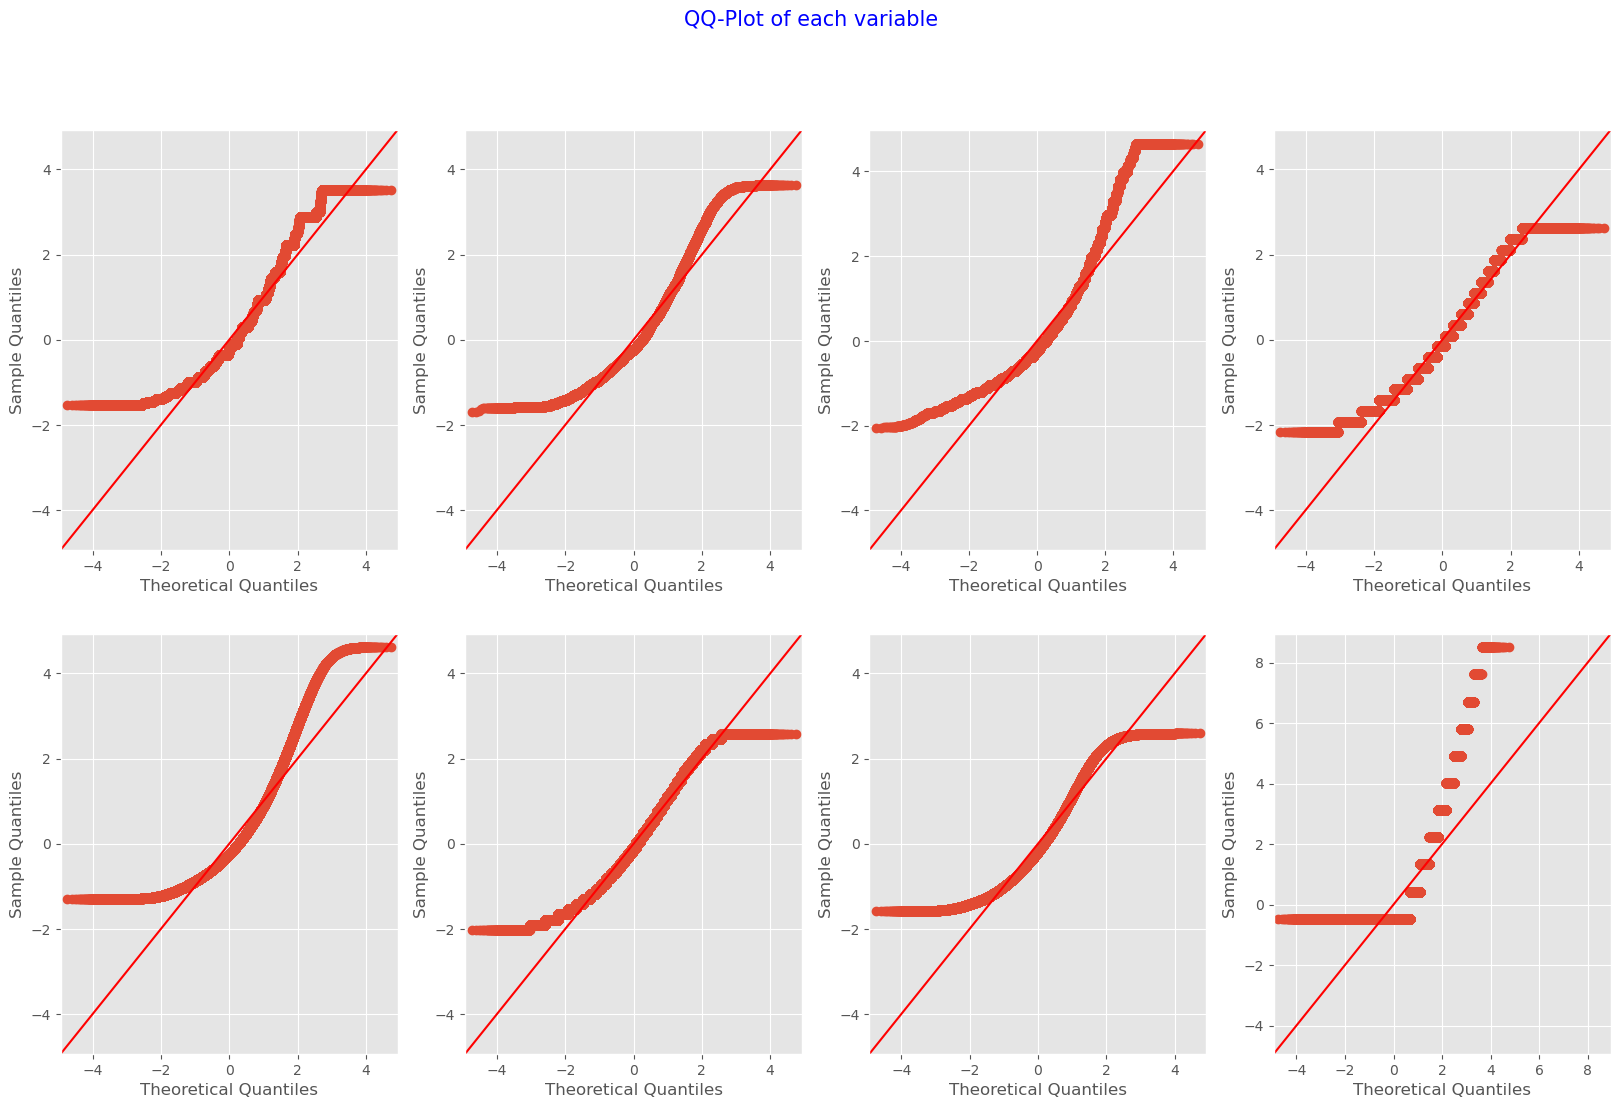

In [275]:
#checking if the data are normally distributed
#in the previous cells we computed the descriptive statistics of the dataset
#mean-mode-median are not equal therefore the distributions of features are not normal
#we will use qq plots and the kolmogorov-smirnov test to highlight further that none of our 
#features is normally distributed
figure, axes = plt.subplots(2, 4, figsize=(20,12))
figure.suptitle("QQ-Plot of each variable", fontsize=15,color="Blue")
sm.qqplot(important_vars_clean["loan_amnt"],fit=True,line="45",ax = axes[0, 0])
sm.qqplot(important_vars_clean["installment"],fit=True,line="45", ax = axes[0, 1])
sm.qqplot(important_vars_clean["annual_inc"],fit=True,line="45",ax = axes[0, 2])
sm.qqplot(important_vars_clean["open_acc"],fit=True,line="45", ax = axes[0, 3])
sm.qqplot(important_vars_clean["revol_bal"],fit=True,line="45",ax = axes[1, 0])
sm.qqplot(important_vars_clean["total_acc"],fit=True,line="45", ax = axes[1, 1])
sm.qqplot(important_vars_clean["tot_cur_bal"],fit=True,line="45",ax = axes[1, 2])
sm.qqplot(important_vars_clean["mort_acc"],fit=True,line="45", ax = axes[1, 3])
plt.show()

In [290]:
#kolmogorov-smirnov test for each variable
print("Using Kolmogorov-Smirnov Test to check if features distribution is normal")
ks_statistic, p_value = kstest(important_vars_clean["loan_amnt"], 'norm')
print(f"for loan amount the ks_stat is:{ks_statistic}, and the p-value is: {p_value}")
ks_statistic, p_value = kstest(important_vars_clean["installment"], 'norm')
print(f"for installment the ks_stat is:{ks_statistic}, and the p-value is: {p_value}")
ks_statistic, p_value = kstest(important_vars_clean["annual_inc"], 'norm')
print(f"for annual income the ks_stat is:{ks_statistic}, and the p-value is: {p_value}")
ks_statistic, p_value = kstest(important_vars_clean["open_acc"], 'norm')
print(f"for open accounts the ks_stat is:{ks_statistic}, and the p-value is: {p_value}")
ks_statistic, p_value = kstest(important_vars_clean["revol_bal"], 'norm')
print(f"for revolving balance the ks_stat is:{ks_statistic}, and the p-value is: {p_value}")
ks_statistic, p_value = kstest(important_vars_clean["total_acc"], 'norm')
print(f"for total accounts the ks_stat is:{ks_statistic}, and the p-value is: {p_value}")
ks_statistic, p_value = kstest(important_vars_clean["tot_cur_bal"], 'norm')
print(f"for total current balance the ks_stat is:{ks_statistic}, and the p-value is: {p_value}")
ks_statistic, p_value = kstest(important_vars_clean["mort_acc"], 'norm')
print(f"for mortgage account the ks_stat is:{ks_statistic}, and the p-value is: {p_value}")
print("Since all p-values are less than 0.05 we reject the null hypothesis that the data follow a normal distribution")

Using Kolmogorov-Smirnov Test to check if features distribution is normal
for loan amount the ks_stat is:1.0, and the p-value is: 0.0
for installment the ks_stat is:0.9999995888519162, and the p-value is: 0.0
for annual income the ks_stat is:0.9999989441698113, and the p-value is: 0.0
for open accounts the ks_stat is:0.9896744895340689, and the p-value is: 0.0
for revolving balance the ks_stat is:0.9947092385881571, and the p-value is: 0.0
for total accounts the ks_stat is:0.9974960795721, and the p-value is: 0.0
for total current balance the ks_stat is:0.9992880838012315, and the p-value is: 0.0
for mortgage account the ks_stat is:0.5, and the p-value is: 0.0
Since all p-values are less than 0.05 we reject the null hypothesis that the data follow a normal distribution


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,1.243422e-07,2230.982105,-2.809293e+07,0.453761,0.050655,0.0
rayleigh,1.273524e-07,2255.773803,-2.807029e+07,0.485746,0.108801,0.0
cauchy,1.334585e-07,2293.869561,-2.802594e+07,0.527856,0.132915,0.0
norm,1.337793e-07,2290.925974,-2.802366e+07,0.534387,0.124357,0.0
expon,1.493402e-07,2210.152439,-2.791944e+07,0.536163,0.172347,0.0


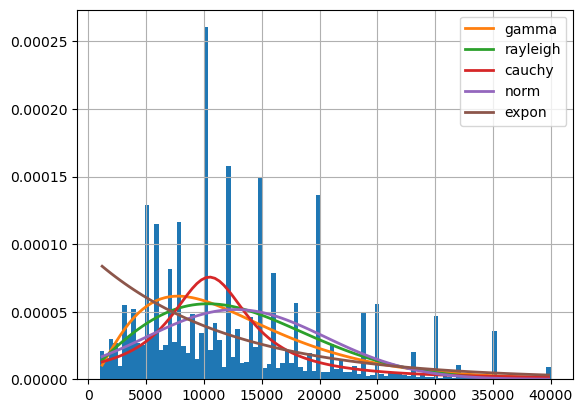

In [29]:
#finding the distribution that best fits each feature 
f = Fitter(important_vars_clean["loan_amnt"],
           distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000005,1547.587851,-2.452581e+07,0.029194,0.024687,0.0
rayleigh,0.000008,1565.146064,-2.410189e+07,0.062456,0.075702,0.0
cauchy,0.000012,1596.654763,-2.372687e+07,0.123795,0.121130,0.0
norm,0.000016,1600.104773,-2.347336e+07,0.148473,0.102207,0.0
expon,0.000051,1505.815844,-2.239142e+07,0.682107,0.216414,0.0


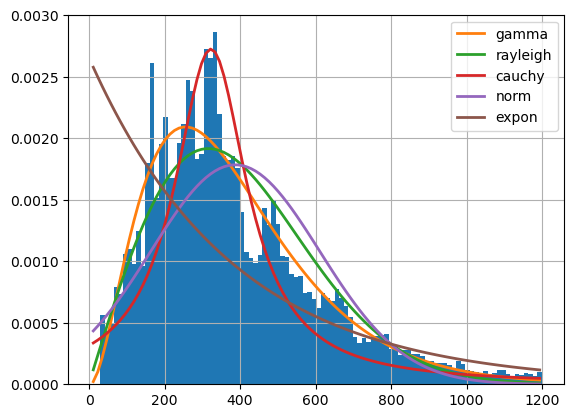

In [30]:
f = Fitter(important_vars_clean["installment"],
           distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,1.267846e-09,inf,-3.243618e+07,0.154189,0.095806,0.0
cauchy,1.544938e-09,2651.103582,-3.224897e+07,0.230963,0.124837,0.0
norm,1.698369e-09,2791.345390,-3.215929e+07,0.275044,0.116052,0.0
uniform,4.412854e-09,2445.214529,-3.125493e+07,1.253023,0.413337,0.0
expon,4.416216e-09,2535.258853,-3.125421e+07,1.228910,0.307216,0.0


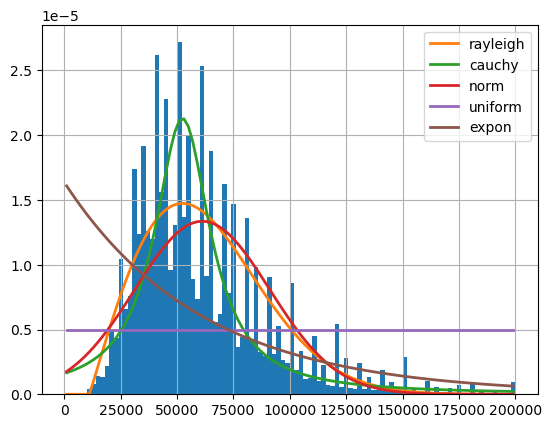

In [31]:
f = Fitter(important_vars_clean["annual_inc"],
           distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.629761,659.605913,-1.257089e+07,inf,0.097167,0.0
rayleigh,1.633825,inf,-1.256853e+07,inf,0.128197,0.0
cauchy,1.653670,708.054052,-1.255709e+07,inf,0.115801,0.0
uniform,1.719437,592.887796,-1.252015e+07,inf,0.194262,0.0
expon,1.802971,655.237618,-1.247522e+07,inf,0.292211,0.0


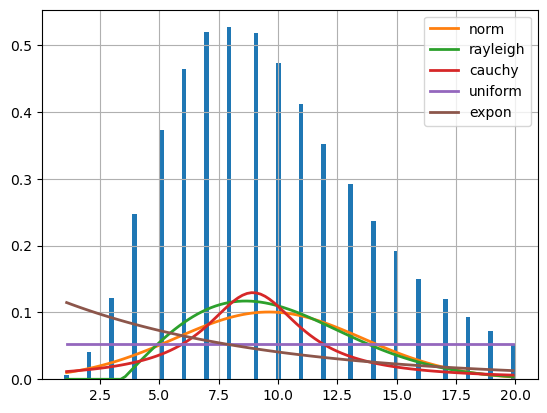

In [32]:
f = Fitter(important_vars_clean["open_acc"],
           distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,8.209383e-10,2366.073544,-3.284781e+07,0.005622,0.013607,9.315669e-153
rayleigh,6.558431e-09,2493.059236,-3.087965e+07,0.057045,0.099264,0.000000e+00
cauchy,9.313807e-09,2413.493534,-3.054745e+07,0.064510,0.150621,0.000000e+00
expon,1.179863e-08,2322.282654,-3.032347e+07,0.060927,0.112045,0.000000e+00
norm,1.282349e-08,2565.480553,-3.024458e+07,0.102265,0.107577,0.000000e+00


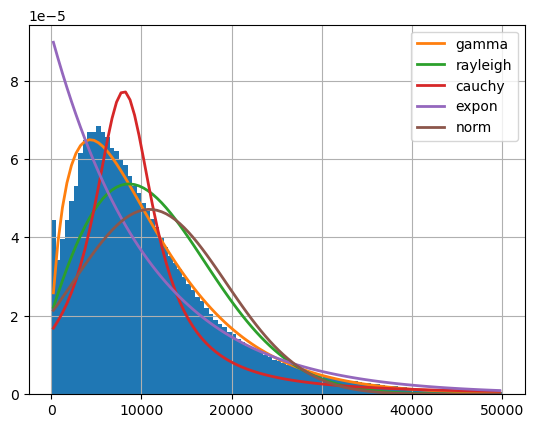

In [33]:
f = Fitter(important_vars_clean["revol_bal"],
           distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,0.146077,inf,-1.485540e+07,inf,0.030872,0.0
norm,0.148908,793.828586,-1.483722e+07,inf,0.069137,0.0
cauchy,0.155654,843.655794,-1.479525e+07,inf,0.114386,0.0
uniform,0.165985,731.517232,-1.473439e+07,inf,0.181294,0.0
expon,0.183548,794.567506,-1.463913e+07,inf,0.245853,0.0


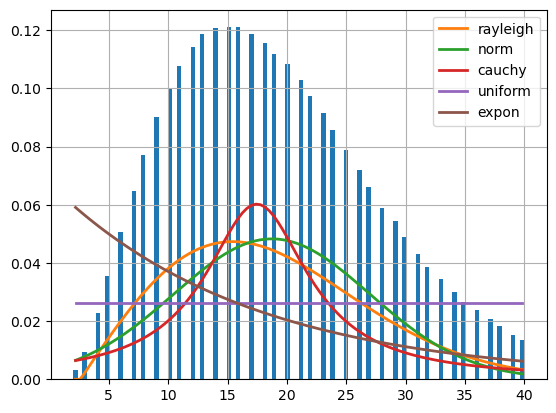

In [34]:
f = Fitter(important_vars_clean["total_acc"],
           distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,5.141122e-10,2342.827893,-3.329109e+07,0.026943,0.051952,0.0
norm,1.409526e-09,2354.148076,-3.233585e+07,0.060999,0.075416,0.0
cauchy,1.843997e-09,2414.976174,-3.208138e+07,0.082875,0.137382,0.0
uniform,3.325341e-09,2285.512990,-3.152292e+07,0.157002,0.221217,0.0
expon,3.377368e-09,2355.410060,-3.150821e+07,0.125652,0.145561,0.0


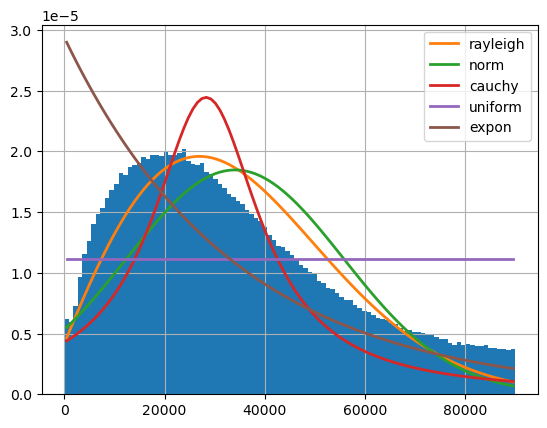

In [35]:
f = Fitter(important_vars_clean["tot_cur_bal"],
           distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,40.619213,1797.753400,-9.525124e+06,inf,0.747509,0.0
rayleigh,52.919352,2316.208439,-9.274583e+06,inf,0.507256,0.0
norm,53.872518,2495.860394,-9.257676e+06,inf,0.426943,0.0
uniform,56.821302,464.517019,-9.207203e+06,inf,0.760186,0.0
chi2,inf,inf,inf,inf,NaN,NaN


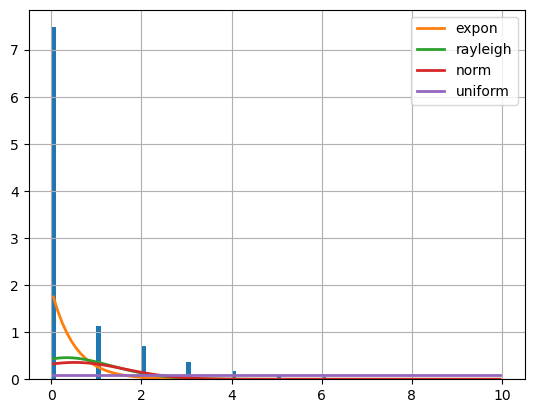

In [36]:
f = Fitter(important_vars_clean["mort_acc"],
           distributions= get_common_distributions())
f.fit()
f.summary()

In [4]:
#part 5 
#dependent variable loan_status
#indepedent variables annual_income,dti,revol_bal,total_cur_bal
#1st we change loan_status to a binary variable where fully paid is 1 and charged off is 0
log_reg_df = final_df.drop(["grade","emp_title","emp_length","home_ownership","revol_util",
                            "pub_rec","pub_rec_bankruptcies","loan_amnt","revol_bal","mort_acc","total_acc",
                            "open_acc","installment"],axis=1)
log_reg_df['loan_status'] = log_reg_df['loan_status'].replace(
    ['Fully Paid','Charged Off'],[1,0])
log_reg_df=log_reg_df.loc[(log_reg_df["loan_status"]==1) | (log_reg_df["loan_status"]==0)]
log_reg_df["loan_status"]=pd.to_numeric(log_reg_df["loan_status"])
log_reg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194930 entries, 0 to 2260697
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   int_rate     1194930 non-null  float64
 1   annual_inc   1194930 non-null  float64
 2   loan_status  1194930 non-null  int64  
 3   dti          1194930 non-null  float64
 4   tot_cur_bal  1194930 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 54.7 MB


In [5]:
#removing outliers 
log_df = log_reg_df.loc[(log_reg_df["annual_inc"] <=200000) & (log_reg_df["tot_cur_bal"] <=90000) & (log_reg_df["dti"]<=50)]
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610045 entries, 5 to 2260697
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   int_rate     610045 non-null  float64
 1   annual_inc   610045 non-null  float64
 2   loan_status  610045 non-null  int64  
 3   dti          610045 non-null  float64
 4   tot_cur_bal  610045 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 27.9 MB


In [56]:
#implementing correlation analysis 
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

In [57]:
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

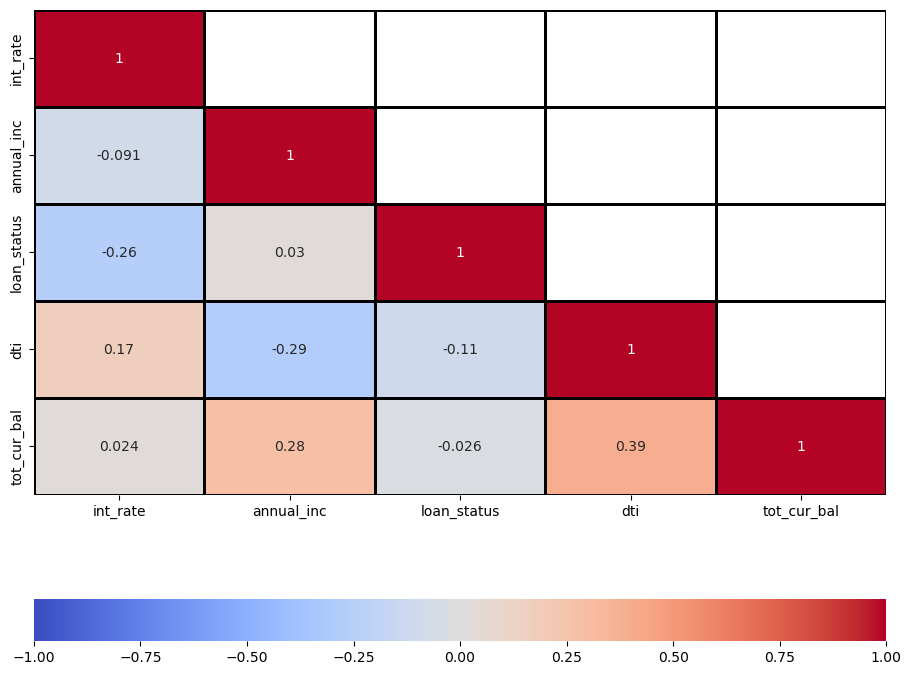

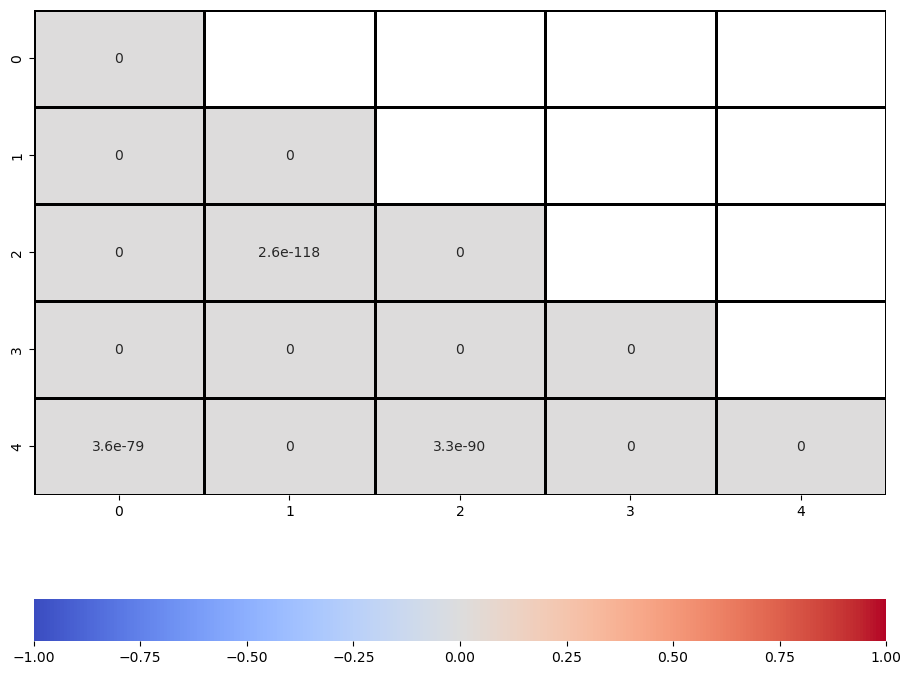

In [58]:
# Plotting with significance filter
corr = log_df.corr()                            # get correlation
p_values = corr_sig(log_df)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))        # mask - it will exclude any variable with p-value>0.05
plot_cor_matrix(corr,mask) 
plot_cor_matrix(p_values,mask)

In [6]:
#X represents the matrix with the independent variables
#Y represents the matrix with the dependent variable
#we place loan_status in the first column of the dataframe then split it into X and y as mentioned above
first_column = log_df.pop('loan_status')
log_df.insert(0, 'loan_status', first_column)
X = log_df.iloc[:, 1:].values
y = log_df.iloc[:, 0].values
#ensuring the dataset was split properly
print(X)
print(y)
print(len(X))
print(len(y))

[[1.3440e+01 3.4000e+04 1.0200e+01 1.2798e+04]
 [6.4900e+00 8.5000e+04 1.3070e+01 2.7957e+04]
 [1.9480e+01 1.5000e+05 9.3900e+00 3.6247e+04]
 ...
 [1.3490e+01 8.6000e+04 4.8000e+00 1.2581e+04]
 [1.2790e+01 1.5000e+05 1.2250e+01 6.5797e+04]
 [1.4490e+01 1.1000e+05 1.8300e+01 6.2426e+04]]
[1 1 0 ... 0 1 0]
610045
610045


In [7]:
#splitting dependent and independendt variables in order to save some data to predict loan status.
#we will save 20% of the dataset and try to predict the loan status
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#we standardize the data because the indepedent variables are measured in different scales
#and this can affect the result 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_test_df=pd.DataFrame(y_test)
print(x_train)
print(x_test)
print(len(x_train))

[[ 1.6626885  -0.95537409  0.77614041 -0.70886601]
 [ 0.07088334 -0.72128885  0.44050619 -0.58007607]
 [-1.54214588 -0.49790465 -0.16856429 -0.61372471]
 ...
 [ 0.97502867 -1.05569633 -0.60747058 -1.29381719]
 [ 0.0878626   0.78354483  2.31583305  0.68868618]
 [-0.61677648 -1.05569633 -0.79054379 -0.64537801]]
[[-1.61855253  0.95074857 -0.66028016 -0.28735106]
 [ 0.41471326 -1.12257783 -1.20949979 -0.55064485]
 [-1.52092181 -0.52064436 -0.43378574 -0.31111371]
 ...
 [ 0.14304518 -1.18273773 -0.99004664 -1.22044321]
 [-1.00942176 -0.35344062 -0.97009636 -0.82328044]
 [-1.61855253  1.95397102 -1.58503458 -0.06536982]]
488036


In [9]:
x_train_2=add_constant(x_train)
log_reg = sm.Logit(y_train, x_train_2).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.496348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               488036
Model:                          Logit   Df Residuals:                   488031
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                 0.06600
Time:                        15:33:19   Log-Likelihood:            -2.4224e+05
converged:                       True   LL-Null:                   -2.5935e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3466      0.004    361.647      0.000       1.339       1.354
x1            -0.5824      0.

In [27]:
x_test_2=add_constant(x_test)
yhat = log_reg.predict(x_test_2)
y_pred=np.round(abs(yhat))
cm = confusion_matrix(y_test, y_pred) 
cm_df=pd.DataFrame(cm)
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_pred))
y_test_df=pd.DataFrame(y_test)
y_pred_df=pd.DataFrame(y_pred)
y_test_values= y_test_df.value_counts()
y_pred_values=y_pred_df.value_counts()
print(f"the values of the test dataset are:\n {y_test_values}")
print(f"the predicted values of the test dataset are:\n {y_pred_values}")


Test accuracy =  0.78063093706202
the values of the test dataset are:
 1    95212
0    26797
dtype: int64
the predicted values of the test dataset are:
 1.0    118019
0.0      3990
dtype: int64


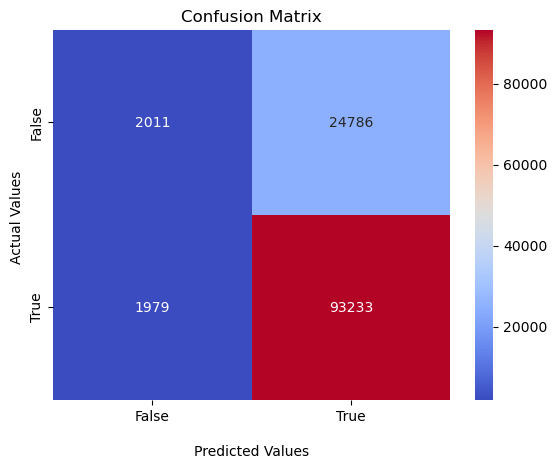

In [12]:
ax = sns.heatmap(cm_df, annot=True, cmap='coolwarm',fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.08      0.13     26797
           1       0.79      0.98      0.87     95212

    accuracy                           0.78    122009
   macro avg       0.65      0.53      0.50    122009
weighted avg       0.73      0.78      0.71    122009

